In [1]:
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('JRC_dataset_text.xlsx', sheet_name='EU floods')
df

,full_text
0,Bonn ❤️ https://t.co/TOLPGlWvQt
1,"Zurich, Switzerland \nvia: joanna_got https://..."
2,"Zurich, Switzerland \nvia: joanna_got https://..."
3,"Zurich, Switzerland \nvia: joanna_got https://..."
4,"Zurich, Switzerland \nvia: joanna_got https://..."
...,...
1114,#NewProfilePic https://t.co/XiJkG4zvCI
1115,Viel Wasser hier #Bern https://t.co/jaJZ1XjYtk
1116,rent a boat https://t.co/e3zsrdPdQY
1117,Her yağmura şemsiye tutulmaz.\nBazen ıslanmak ...


In [3]:
# Import required library
from langdetect import detect

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Detect language for each text
df['language'] = df['full_text'].apply(detect_language)

# Show language distribution
language_counts = df['language'].value_counts()
print("Language distribution in the dataset:")
print(language_counts)

Language distribution in the dataset:
language
nl         523
en         192
fr         117
de         114
af          54
sv          40
tr          26
es           8
no           6
da           5
sw           4
ro           3
pl           3
fi           3
ar           3
sk           2
sl           2
unknown      2
so           2
sq           1
ur           1
id           1
ru           1
fa           1
ja           1
et           1
it           1
he           1
tl           1
Name: count, dtype: int64


Jumlah bahasa unik yang ada: 29


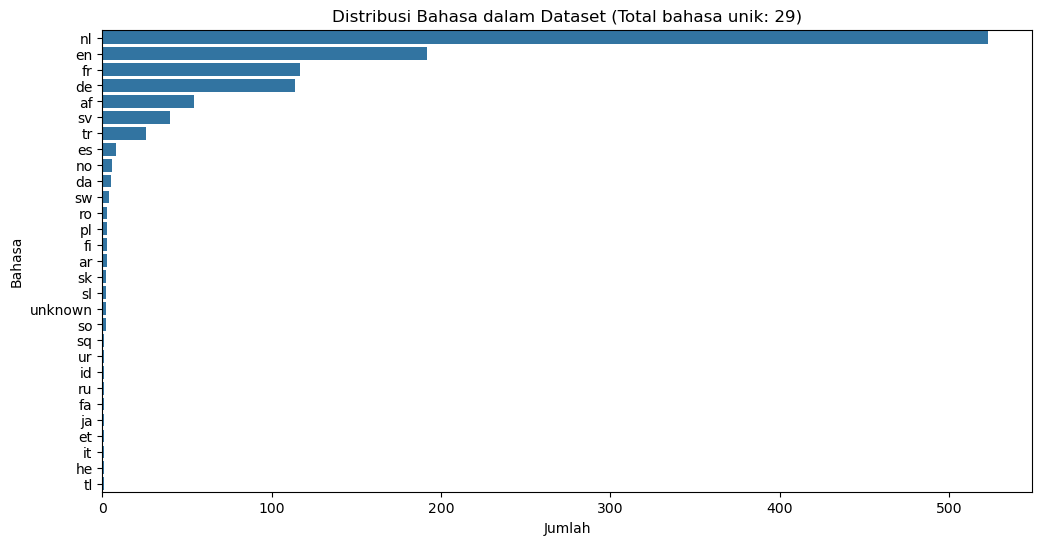

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

# Menghitung jumlah bahasa unik
unique_languages_count = df['language'].nunique()
print(f"Jumlah bahasa unik yang ada: {unique_languages_count}")

# Menampilkan jumlah bahasa unik dalam plot
plt.figure(figsize=(12, 6))
sns.countplot(y='language', data=df, order=language_counts.index)
plt.title(f'Distribusi Bahasa dalam Dataset (Total bahasa unik: {unique_languages_count})')
plt.xlabel('Jumlah')
plt.ylabel('Bahasa')
plt.show()

In [5]:
# Import libraries
from langdetect import detect
from deep_translator import GoogleTranslator
import pandas as pd

# Function to translate text to English
def translate_to_english(text, source_lang):
    try:
        # If the text is already in English, return it as-is
        if source_lang == 'en':
            return text
        # Translate text to English
        translator = GoogleTranslator(source=source_lang, target='en')
        return translator.translate(text)
    except:
        return 'Translation error'

# Detect language for each text
df['language'] = df['full_text'].apply(detect_language)

# Translate all non-English texts to English
df['english_translation'] = df.apply(
    lambda row: translate_to_english(row['full_text'], row['language']),
    axis=1
)

# View result: displaying the first few rows
print(df[['full_text', 'language', 'english_translation']].head())


                                           full_text language  \
0                    Bonn ❤️ https://t.co/TOLPGlWvQt       de   
1  Zurich, Switzerland \nvia: joanna_got https://...       nl   
2  Zurich, Switzerland \nvia: joanna_got https://...       nl   
3  Zurich, Switzerland \nvia: joanna_got https://...       nl   
4  Zurich, Switzerland \nvia: joanna_got https://...       de   

                                 english_translation  
0                    Bonn ❤️ https://t.co/TOLPGlWvQt  
1  Zurich, Switzerland \nvia: joanna_got https://...  
2  Zurich, Switzerland \nvia: joanna_got https://...  
3  Zurich, Switzerland \nvia: joanna_got https://...  
4  Zurich, Switzerland \nvia: joanna_got https://...  


In [6]:
# Remove rows with 'Translation error' in english_translation column
df = df[df['english_translation'] != 'Translation error']

# Verify results
print(f"Number of rows after removing translation errors: {len(df)}")

Number of rows after removing translation errors: 1116


In [7]:
df

,full_text,language,english_translation
0,Bonn ❤️ https://t.co/TOLPGlWvQt,de,Bonn ❤️ https://t.co/TOLPGlWvQt
1,"Zurich, Switzerland \nvia: joanna_got https://...",nl,"Zurich, Switzerland \nvia: joanna_got https://..."
2,"Zurich, Switzerland \nvia: joanna_got https://...",nl,"Zurich, Switzerland \nvia: joanna_got https://..."
3,"Zurich, Switzerland \nvia: joanna_got https://...",nl,"Zurich, Switzerland \nvia: joanna_got https://..."
4,"Zurich, Switzerland \nvia: joanna_got https://...",de,"Zurich, Switzerland \nvia: joanna_got https://..."
...,...,...,...
1114,#NewProfilePic https://t.co/XiJkG4zvCI,en,#NewProfilePic https://t.co/XiJkG4zvCI
1115,Viel Wasser hier #Bern https://t.co/jaJZ1XjYtk,de,Lots of water here #Bern https://t.co/jaJZ1XjYtk
1116,rent a boat https://t.co/e3zsrdPdQY,en,rent a boat https://t.co/e3zsrdPdQY
1117,Her yağmura şemsiye tutulmaz.\nBazen ıslanmak ...,tr,You can't hold an umbrella against every rain....


In [8]:
languages_found = language_counts.index.tolist()
print("Bahasa yang ditemukan dalam dataset:")
print(languages_found)

Bahasa yang ditemukan dalam dataset:
['nl', 'en', 'fr', 'de', 'af', 'sv', 'tr', 'es', 'no', 'da', 'sw', 'ro', 'pl', 'fi', 'ar', 'sk', 'sl', 'unknown', 'so', 'sq', 'ur', 'id', 'ru', 'fa', 'ja', 'et', 'it', 'he', 'tl']


In [9]:
# Drop 'full_text' and 'language' columns
df = df.drop(['full_text', 'language'], axis=1)

# Display the updated dataframe
df.head()

,english_translation
0,Bonn ❤️ https://t.co/TOLPGlWvQt
1,"Zurich, Switzerland \nvia: joanna_got https://..."
2,"Zurich, Switzerland \nvia: joanna_got https://..."
3,"Zurich, Switzerland \nvia: joanna_got https://..."
4,"Zurich, Switzerland \nvia: joanna_got https://..."


In [10]:
# Save the dataframe to an Excel file
df.to_excel('eu_english_dataset.xlsx', index=False)

print("Dataframe has been saved to 'eu_english_dataset.xlsx'")

Dataframe has been saved to 'eu_english_dataset.xlsx'
